In [74]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Morpeth_rainfall = pd.read_csv(os.path.join(path, 'Morpeth_rainfall.csv'))
Morpeth_water = pd.read_csv(os.path.join(path, 'Morpeth_water.csv'))

In [75]:
Morpeth_rainfall['dateTime'] = pd.to_datetime(Morpeth_rainfall['dateTime'])
Morpeth_water['dateTime'] = pd.to_datetime(Morpeth_water['dateTime'])

In [76]:
Morpeth_water.set_index('dateTime', inplace=True)
Morpeth_rainfall.set_index('dateTime', inplace=True)

In [77]:
start_date = pd.to_datetime('01/01/2017 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('31/12/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
Morpeth_water_subset = Morpeth_water.loc[(Morpeth_water.index >= start_date) & (Morpeth_water.index <= end_date)]
Morpeth_rainfall_subset = Morpeth_rainfall.loc[(Morpeth_rainfall.index >= start_date) & (Morpeth_rainfall.index <= end_date)]

In [78]:
Morpeth_water_subset.shape

(140161, 1)

In [79]:
Morpeth_rainfall_subset.shape

(140161, 1)

In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
merged_data = pd.merge(Morpeth_rainfall_subset, Morpeth_water_subset, on='dateTime', how='inner')

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [83]:
train_data = merged_data[:112128]
test_data = merged_data[112128:]

In [11]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lr_Mor_96in_48out = LinearRegression()
cv_scores_Mor_96in_48out_lr = cross_val_score(lr_Mor_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [13]:
cv_scores_Mor_96in_48out_lr = -cv_scores_Mor_96in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_96in_48out_lr)
print("Mean MSE:", cv_scores_Mor_96in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_48out_lr.std())

Cross-validation scores:
[0.00091343 0.00152526 0.00012194 0.00141693 0.00191403]
Mean MSE: 0.0011783195441020583
Standard Deviation MSE: 0.0006172009791241853


In [14]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
lr_Mor_48in_48out = LinearRegression()
cv_scores_Mor_48in_48out_lr = cross_val_score(lr_Mor_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [16]:
cv_scores_Mor_48in_48out_lr = -cv_scores_Mor_48in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_48in_48out_lr)
print("Mean MSE:", cv_scores_Mor_48in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_48out_lr.std())

Cross-validation scores:
[0.00093787 0.00152474 0.00013109 0.00135974 0.00193404]
Mean MSE: 0.0011774949225099543
Standard Deviation MSE: 0.0006129509875000068


In [17]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
lr_Mor_24in_48out = LinearRegression()
cv_scores_Mor_24in_48out_lr = cross_val_score(lr_Mor_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [19]:
cv_scores_Mor_24in_48out_lr = -cv_scores_Mor_24in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_24in_48out_lr)
print("Mean MSE:", cv_scores_Mor_24in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_48out_lr.std())

Cross-validation scores:
[0.00095723 0.00150669 0.00013807 0.00138062 0.00197065]
Mean MSE: 0.0011906509615595513
Standard Deviation MSE: 0.0006175413221484748


Now try the different window size 24,48,96 for 32output

In [20]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [21]:
lr_Mor_96in_32out = LinearRegression()
cv_scores_Mor_96in_32out_lr = cross_val_score(lr_Mor_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [22]:
cv_scores_Mor_96in_32out_lr = -cv_scores_Mor_96in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_96in_32out_lr)
print("Mean MSE:", cv_scores_Mor_96in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_32out_lr.std())

Cross-validation scores:
[5.11843823e-04 7.80629420e-04 7.69212136e-05 7.48292172e-04
 9.88849973e-04]
Mean MSE: 0.0006213073201337115
Standard Deviation MSE: 0.00031142728709222605


In [23]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [24]:
lr_Mor_48in_32out = LinearRegression()
cv_scores_Mor_48in_32out_lr = cross_val_score(lr_Mor_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [25]:
cv_scores_Mor_48in_32out_lr = -cv_scores_Mor_48in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_48in_32out_lr)
print("Mean MSE:", cv_scores_Mor_48in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_32out_lr.std())

Cross-validation scores:
[5.20097317e-04 7.79476542e-04 8.03060336e-05 7.22825292e-04
 9.92898777e-04]
Mean MSE: 0.0006191207922734466
Standard Deviation MSE: 0.0003086439904668106


In [26]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [27]:
lr_Mor_24in_32out = LinearRegression()
cv_scores_Mor_24in_32out_lr = cross_val_score(lr_Mor_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [28]:
cv_scores_Mor_24in_32out_lr = -cv_scores_Mor_24in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_24in_32out_lr)
print("Mean MSE:", cv_scores_Mor_24in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_32out_lr.std())

Cross-validation scores:
[5.27511713e-04 7.68138847e-04 8.28782302e-05 7.45525415e-04
 1.01276992e-03]
Mean MSE: 0.0006273648248676166
Standard Deviation MSE: 0.00031265080624378905


Now try the different window size 24,48,96 for 16output

In [29]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
lr_Mor_96in_16out = LinearRegression()
cv_scores_Mor_96in_16out_lr = cross_val_score(lr_Mor_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [31]:
cv_scores_Mor_96in_16out_lr = -cv_scores_Mor_96in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_96in_16out_lr)
print("Mean MSE:", cv_scores_Mor_96in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_16out_lr.std())

Cross-validation scores:
[1.29467383e-04 1.94797278e-04 2.68335146e-05 2.26614531e-04
 2.70823427e-04]
Mean MSE: 0.00016970722659961308
Standard Deviation MSE: 8.499950648427315e-05


In [32]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [33]:
lr_Mor_48in_16out = LinearRegression()
cv_scores_Mor_48in_16out_lr = cross_val_score(lr_Mor_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [34]:
cv_scores_Mor_48in_16out_lr = -cv_scores_Mor_48in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_48in_16out_lr)
print("Mean MSE:", cv_scores_Mor_48in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_16out_lr.std())

Cross-validation scores:
[1.30654463e-04 1.94655734e-04 2.72835998e-05 2.23162270e-04
 2.69117759e-04]
Mean MSE: 0.00016897476525487521
Standard Deviation MSE: 8.38680499585083e-05


In [35]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
lr_Mor_24in_16out = LinearRegression()
cv_scores_Mor_24in_16out_lr = cross_val_score(lr_Mor_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [37]:
cv_scores_Mor_24in_16out_lr = -cv_scores_Mor_24in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_24in_16out_lr)
print("Mean MSE:", cv_scores_Mor_24in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_16out_lr.std())

Cross-validation scores:
[1.31048644e-04 1.92499550e-04 2.78989661e-05 2.33456596e-04
 2.72657146e-04]
Mean MSE: 0.00017151218021211294
Standard Deviation MSE: 8.575539325821005e-05


Now try the different window size 24,48,96 for 8output

In [38]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [39]:
lr_Mor_96in_8out = LinearRegression()
cv_scores_Mor_96in_8out_lr = cross_val_score(lr_Mor_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [40]:
cv_scores_Mor_96in_8out_lr = -cv_scores_Mor_96in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_96in_8out_lr)
print("Mean MSE:", cv_scores_Mor_96in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_8out_lr.std())

Cross-validation scores:
[2.93473193e-05 3.70992128e-05 7.90139435e-06 4.97254266e-05
 5.81555341e-05]
Mean MSE: 3.644577743230783e-05
Standard Deviation MSE: 1.7396893444933614e-05


In [41]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [42]:
lr_Mor_48in_8out = LinearRegression()
cv_scores_Mor_48in_8out_lr = cross_val_score(lr_Mor_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [43]:
cv_scores_Mor_48in_8out_lr = -cv_scores_Mor_48in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_48in_8out_lr)
print("Mean MSE:", cv_scores_Mor_48in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_8out_lr.std())

Cross-validation scores:
[2.94589333e-05 3.70662212e-05 7.93366797e-06 4.92376287e-05
 5.75691877e-05]
Mean MSE: 3.6253127775407e-05
Standard Deviation MSE: 1.7156839333846233e-05


In [44]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [45]:
lr_Mor_24in_8out = LinearRegression()
cv_scores_Mor_24in_8out_lr = cross_val_score(lr_Mor_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [46]:
cv_scores_Mor_24in_8out_lr = -cv_scores_Mor_24in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Mor_24in_8out_lr)
print("Mean MSE:", cv_scores_Mor_24in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_8out_lr.std())

Cross-validation scores:
[2.94943888e-05 3.68497840e-05 7.98019059e-06 5.09278231e-05
 5.78506731e-05]
Mean MSE: 3.6620571923748484e-05
Standard Deviation MSE: 1.7472956816193487e-05


Use grid search to find the best parameters for the selected window size of different output size

In [ ]:
cv_scores_Mor_48in_48out_lr

In [ ]:
cv_scores_Mor_48in_32out_lr

In [ ]:
cv_scores_Mor_48in_16out_lr

In [ ]:
cv_scores_Mor_48in_8out_lr

In [47]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [48]:
lr_Mor_48in_48out_1 = LinearRegression()

In [49]:
lr_Mor_48in_48out_1.fit(X_train, y_train)

LinearRegression()

In [50]:
pred_lr_Mor_48in_48out = lr_Mor_48in_48out_1.predict(X_test)

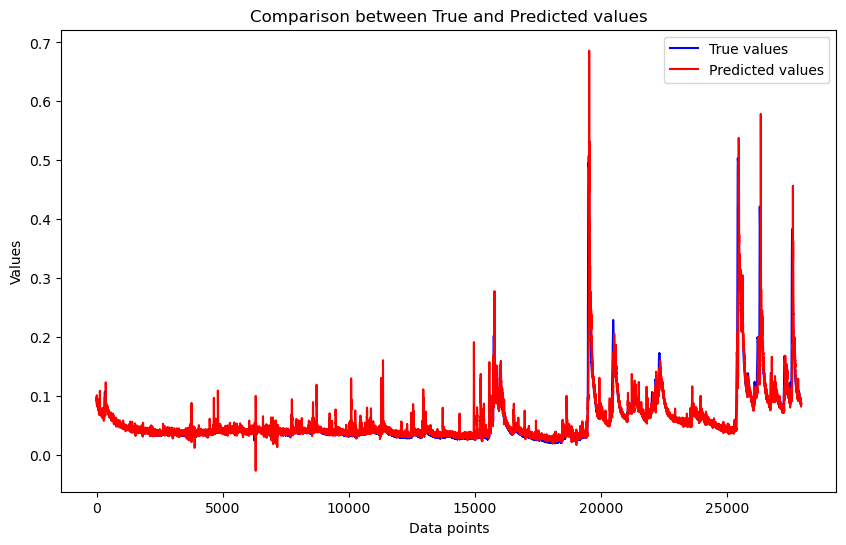

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Mor_48in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [52]:
def nse(y_test, pred_lr_Mor_48in_48out):
    numerator = np.sum((y_test - pred_lr_Mor_48in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Mor_48in_48out)
mae = mean_absolute_error(y_test, pred_lr_Mor_48in_48out)
nse_value = nse(y_test, pred_lr_Mor_48in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0006275571381686169
MAE: 0.008983458049037447
NSE: 0.7381015921091472


In [55]:
from joblib import dump
dump(lr_Mor_48in_48out, 'lr_Mor_48in_48out.joblib')

['lr_Mor_48in_48out.joblib']

In [56]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [57]:
lr_Mor_48in_32out = LinearRegression()
lr_Mor_48in_32out.fit(X_train, y_train)

LinearRegression()

In [58]:
pred_lr_Mor_48in_32out = lr_Mor_48in_32out.predict(X_test)

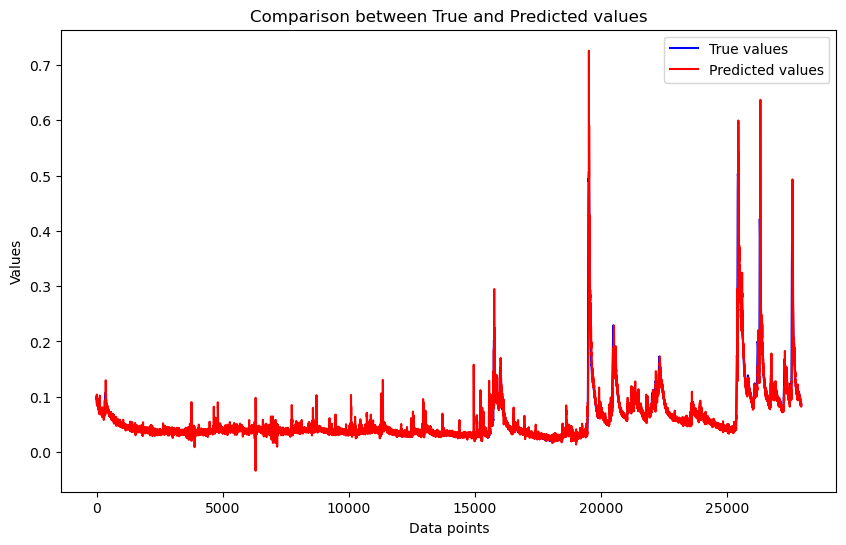

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Mor_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [60]:
def nse(y_test, pred_lr_Mor_48in_32out):
    numerator = np.sum((y_test - pred_lr_Mor_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Mor_48in_32out)
mae = mean_absolute_error(y_test, pred_lr_Mor_48in_32out)
nse_value = nse(y_test, pred_lr_Mor_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0003442966389317847
MAE: 0.006364247077761051
NSE: 0.8562822449354521


In [61]:
from joblib import dump
dump(lr_Mor_48in_32out, 'lr_Mor_48in_32out.joblib')

['lr_Mor_48in_32out.joblib']

In [62]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [63]:
lr_Mor_48in_16out = LinearRegression()
lr_Mor_48in_16out.fit(X_train, y_train)

LinearRegression()

In [64]:
pred_lr_Mor_48in_16out = lr_Mor_48in_16out.predict(X_test)

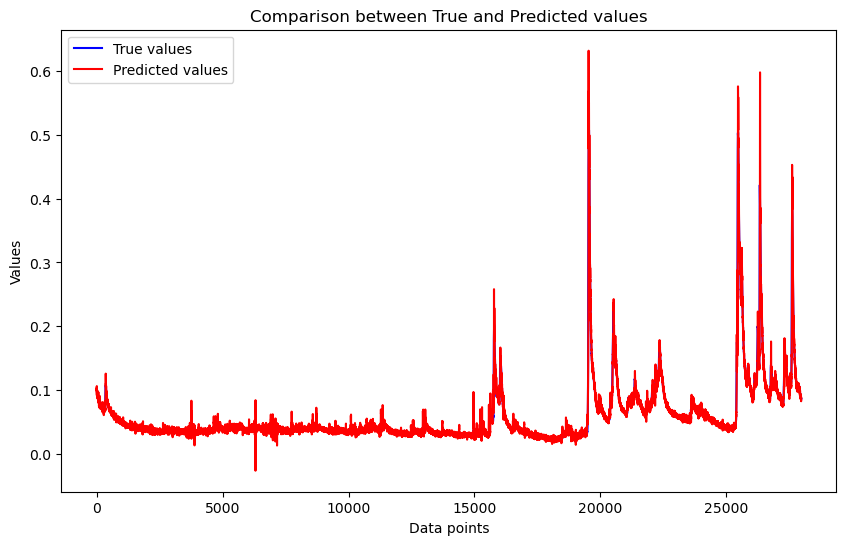

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Mor_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [66]:
def nse(y_test, pred_lr_Mor_48in_16out):
    numerator = np.sum((y_test - pred_lr_Mor_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Mor_48in_16out)
mae = mean_absolute_error(y_test, pred_lr_Mor_48in_16out)
nse_value = nse(y_test, pred_lr_Mor_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00010141943175848783
MAE: 0.0034855129230350374
NSE: 0.9576584158063842


In [67]:
from joblib import dump
dump(lr_Mor_48in_16out, 'lr_Mor_48in_16out.joblib')

['lr_Mor_48in_16out.joblib']

In [84]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [85]:
lr_Mor_48in_8out = LinearRegression()
lr_Mor_48in_8out.fit(X_train, y_train)

LinearRegression()

In [86]:
pred_lr_Mor_48in_8out = lr_Mor_48in_8out.predict(X_test)

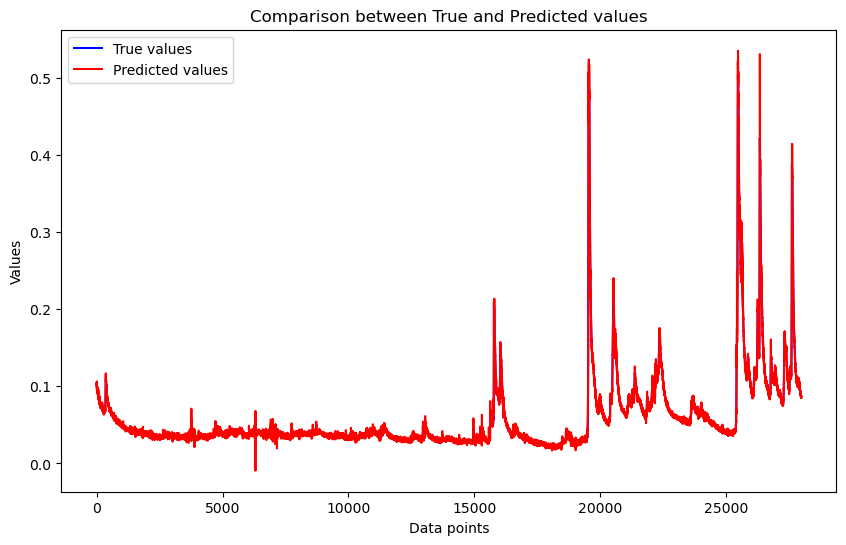

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Mor_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [88]:
def nse(y_test, pred_lr_Mor_48in_8out):
    numerator = np.sum((y_test - pred_lr_Mor_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Mor_48in_8out)
mae = mean_absolute_error(y_test, pred_lr_Mor_48in_8out)
nse_value = nse(y_test, pred_lr_Mor_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 2.3787903670523984e-05
MAE: 0.0018757500555715535
NSE: 0.99006834691042


In [89]:
dump(lr_Mor_48in_8out, 'lr_Mor_48in_8out.joblib')

['lr_Mor_48in_8out.joblib']